In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('json/angles_13.csv')
df

,Data,Frame,left_arm,right_arm,left_elbow,right_elbow,left_waist_leg,right_waist_leg,left_knee,right_kneee,leftup_chest_inside,rightup_chest_inside,leftlow_chest_inside,rightlow_chest_inside,leg_spread
0,"[{'X': 0.4833790361881256, 'Y': 0.294812440872...",0,23.601473,12.751360,174.853980,169.601054,167.159386,168.788805,179.287017,179.716307,83.319455,82.597954,98.742145,91.227074,37.260095
1,"[{'X': 0.4835801124572754, 'Y': 0.294852554798...",1,23.621931,12.894650,174.758119,169.773449,167.661377,168.605542,179.996630,179.566293,83.065925,82.788702,97.930294,91.657414,36.744938
2,"[{'X': 0.4838849902153015, 'Y': 0.294873952865...",2,23.694459,12.969590,174.690819,169.926532,168.012126,168.577495,179.423562,179.547380,82.921925,82.906226,97.333005,91.905525,36.279343
3,"[{'X': 0.4841047525405884, 'Y': 0.294852823019...",3,23.705468,12.996209,174.666872,169.986297,168.272435,168.570871,179.120662,179.576211,82.802500,83.028339,96.846097,92.141435,35.982959
4,"[{'X': 0.4841686189174652, 'Y': 0.294777154922...",4,23.705424,13.053929,174.655856,170.103835,168.348729,168.524051,179.029729,179.484526,82.756730,83.068577,96.691334,92.261193,35.924740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,"[{'X': 0.48054423928260803, 'Y': 0.29292860627...",1104,20.421291,13.460143,178.269920,169.739278,174.123672,169.636900,176.826247,178.628721,84.002710,81.731117,92.351064,89.622190,29.377058
1105,"[{'X': 0.480549693107605, 'Y': 0.2930911183357...",1105,20.522239,13.425830,178.330427,169.662291,174.101794,169.660426,176.844601,178.603554,83.976487,81.754617,92.383352,89.585531,29.374666
1106,"[{'X': 0.48055487871170044, 'Y': 0.29342129826...",1106,20.581019,13.426049,178.429792,169.644319,174.104322,169.675202,176.847499,178.586911,83.927227,81.816159,92.348183,89.615680,29.378010
1107,"[{'X': 0.4805610775947571, 'Y': 0.294127196073...",1107,20.665500,13.394933,178.543092,169.570020,174.103511,169.678396,176.851154,178.573929,83.877490,81.870203,92.348227,89.617560,29.399873


In [3]:
def lineplotdf(dataframe):
    """
    Plot a line chart using the first column as x-axis and the second column as y-axis.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.

    Returns:
    - None
    """
    if len(dataframe.columns) < 2:
        raise ValueError("DataFrame must have at least two columns.")

    x_column = dataframe.columns[0]
    y_column = dataframe.columns[1]

    plt.plot(dataframe[x_column], dataframe[y_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Line Chart: {y_column} vs {x_column}')
    plt.show()
    
def find_and_plot_deflection_points(df, threshold=0.05):
    # Assuming the DataFrame has two columns: 'Frame' and 'Smoothed_Y'
    x = df.iloc[:, 0]  # Assuming the first column is 'Frame'
    smoothed_y = df.iloc[:, 1]  # Assuming the second column is the smoothened y

    # Calculate the derivative (slope) of the smoothened y
    slope = np.gradient(smoothed_y, x)

    # Find indices where the slope exceeds the threshold
    deflection_indices = np.where(np.abs(slope) > threshold)[0]

    # Plot the original data and highlight deflection points
    plt.plot(x, smoothed_y, label='Smoothed Data')
    plt.scatter(x.iloc[deflection_indices], smoothed_y.iloc[deflection_indices], color='red', label='Deflection Points')
    
    # Adding labels and title
    plt.xlabel('Frame')
    plt.ylabel('Smoothed Y')
    plt.title('Deflection Points from Smoothened Data')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.show()
    
def find_and_plot_apex_points_with_annotation(df, annotated_y_values):
    # Assuming the DataFrame has two columns: 'Frame' and 'Smoothed_Y'
    x = df.iloc[:, 0]  # Assuming the first column is 'Frame'
    smoothed_y = df.iloc[:, 1]  # Assuming the second column is the smoothened y

    # Calculate the first and second derivatives of the smoothened y
    first_derivative = np.gradient(smoothed_y, x)
    second_derivative = np.gradient(first_derivative, x)

    # Find indices where the second derivative changes sign
    apex_indices = np.where(np.diff(np.sign(second_derivative)))[0]

    # Plot the original data
    plt.plot(x, smoothed_y, label='Smoothed Data')

    # Display vertical lines at apex points
    for apex_index in apex_indices:
        plt.axvline(x=x.iloc[apex_index], color='red', linestyle='--', label='Apex Point')

    # Annotate y values at specified points
    for y_value in annotated_y_values:
        plt.axhline(y=y_value, color='green', linestyle='--', label=f'Annotated Y={y_value}')

    # Adding labels and title
    plt.xlabel('Frame')
    plt.ylabel('Smoothed Y')
    plt.title('Apex Points with Annotations from Smoothened Data')

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()

In [4]:
velo = df[['Frame','left_knee']]
velo

,Frame,left_knee
0,0,179.287017
1,1,179.996630
2,2,179.423562
3,3,179.120662
4,4,179.029729
...,...,...
1104,1104,176.826247
1105,1105,176.844601
1106,1106,176.847499
1107,1107,176.851154


<AxesSubplot: title={'center': 'Scatter Plot: Frame vs. left_knee'}, xlabel='Frame', ylabel='left_arm'>

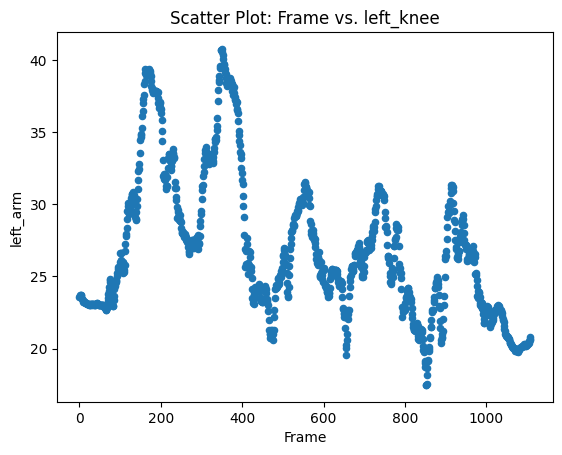

In [5]:
df.plot.scatter(x='Frame', y='left_arm', title='Scatter Plot: Frame vs. left_knee')

In [7]:
columns_to_smooth = [col for col in df.columns if col not in ['Data', 'Frame', 'Angular_Velocity', 'Angular_Acceleration']]

# Apply rolling mean with a window size of 50 to selected columns
df[columns_to_smooth] = df[columns_to_smooth].rolling(window=90, min_periods=1, axis=0).mean()

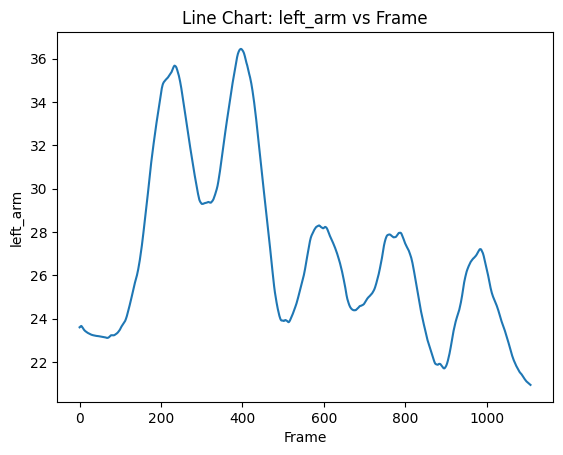

In [8]:
lineplotdf(df[['Frame','left_arm']])

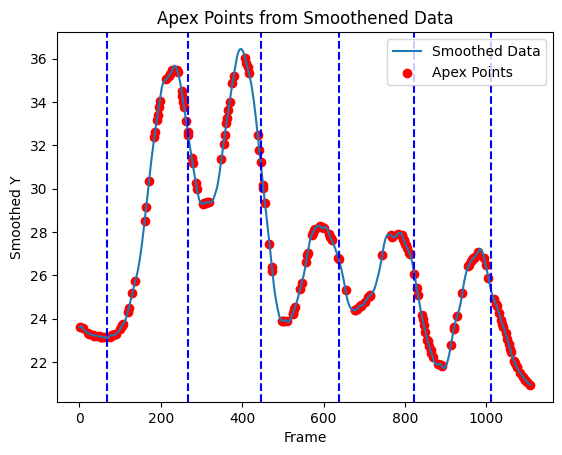

In [9]:
def find_and_plot_apex_points(df, annotated_x_values=None):
    # Assuming the DataFrame has two columns: 'Frame' and 'Smoothed_Y'
    x = df.iloc[:, 0]  # Assuming the first column is 'Frame'
    smoothed_y = df.iloc[:, 1]  # Assuming the second column is the smoothened y

    # Calculate the first and second derivatives of the smoothened y
    first_derivative = np.gradient(smoothed_y, x)
    second_derivative = np.gradient(first_derivative, x)

    # Find indices where the second derivative changes sign
    apex_indices = np.where(np.diff(np.sign(second_derivative)))[0]

    # Plot the original data and highlight apex points
    plt.plot(x, smoothed_y, label='Smoothed Data')
    plt.scatter(x.iloc[apex_indices], smoothed_y.iloc[apex_indices], color='red', label='Apex Points')

    # Plot vertical lines at annotated x values
    if annotated_x_values:
        for x_value in annotated_x_values:
            plt.axvline(x_value, color='blue', linestyle='--')

    # Adding labels and title
    plt.xlabel('Frame')
    plt.ylabel('Smoothed Y')
    plt.title('Apex Points from Smoothened Data')

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()

find_and_plot_apex_points(df[['Frame','left_arm']], [68, 267, 447, 637, 821, 1011])

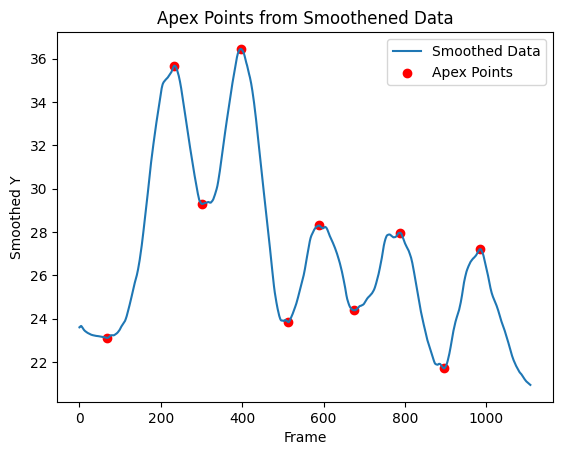

In [10]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

def find_and_plot_apex_points(df, window_size=100):
    # Assuming the DataFrame has two columns: 'Frame' and 'Smoothed_Y'
    x = df.iloc[:, 0]  # Assuming the first column is 'Frame'
    smoothed_y = df.iloc[:, 1]  # Assuming the second column is the smoothened y

    # Find relative maxima (peaks) within a window of 100 frames
    peaks_indices = argrelextrema(smoothed_y.values, np.greater, order=window_size)[0]

    # Find relative minima (valleys) within a window of 100 frames
    valleys_indices = argrelextrema(smoothed_y.values, np.less, order=window_size)[0]

    # Combine peaks and valleys indices
    apex_indices = np.sort(np.concatenate([peaks_indices, valleys_indices]))

    # Plot the original data and highlight apex points
    plt.plot(x, smoothed_y, label='Smoothed Data')
    plt.scatter(x.iloc[apex_indices], smoothed_y.iloc[apex_indices], color='red', label='Apex Points')

    # Adding labels and title
    plt.xlabel('Frame')
    plt.ylabel('Smoothed Y')
    plt.title('Apex Points from Smoothened Data')

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()
    return apex_indices

# Example usage with a DataFrame 'df'
# Assuming 'df' has columns 'Frame' and 'left_arm_smoothed' (replace with your actual column names)
indices = find_and_plot_apex_points(df[['Frame', 'left_arm']])

In [19]:
indices
[68, 267, 447, 637, 821, 1011]

array([ 68, 233, 301, 397, 513, 589, 675, 788, 896, 985], dtype=int64)